In [88]:
import pandas as pd
import numpy as np
import os


In [89]:
# dataset = pd.read_csv('insurance.csv')
dataset = pd.read_csv('https://raw.githubusercontent.com/wesleymmauricio/curso-ia/refs/heads/main/challenger-1/bases/insurance.csv')

In [90]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
np.random.seed(42)

In [92]:
dataset.shape

(1338, 7)

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
set(dataset["sex"])

{'female', 'male'}

In [95]:
set(dataset["sex"])

{'female', 'male'}

In [96]:
set(dataset["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [97]:
dataset["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [98]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Criado um dataframe temporário para converter as variáveis categóricas em números para que seja obtido a correlação de todas

In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_temp = dataset.copy()
for col in ['sex', 'region', 'smoker']:
    df_temp[col] = le.fit_transform(df_temp[col])

corr = df_temp.corr()
df_temp.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

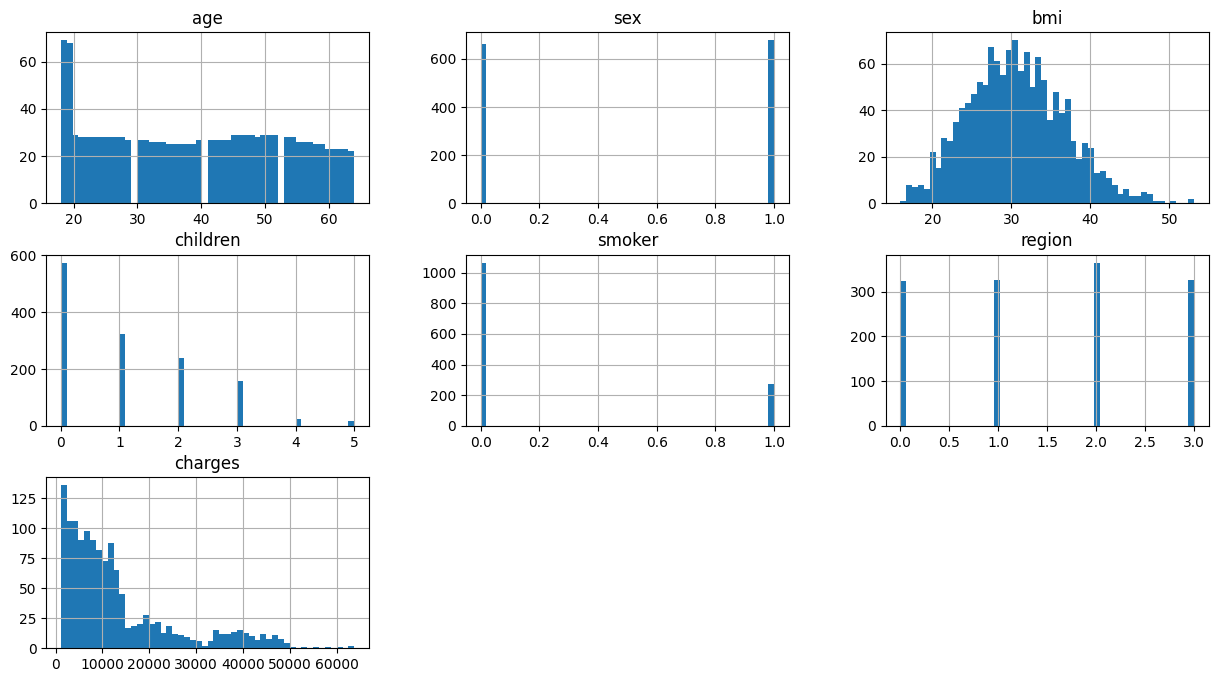

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
df_temp.hist(bins=50, figsize=(15,8))

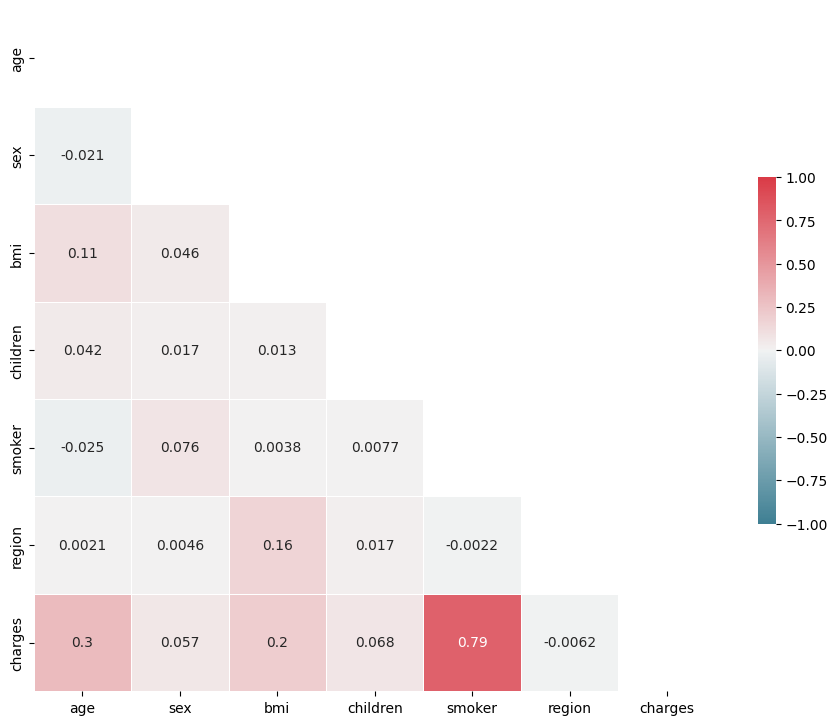

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

Insight :: Fumar tem o maior impacto nos custos médicos (charges) com uma correlação forte de 0.787. Isso é significativamente mais alto do que idade, IMC ou qualquer outra variável.



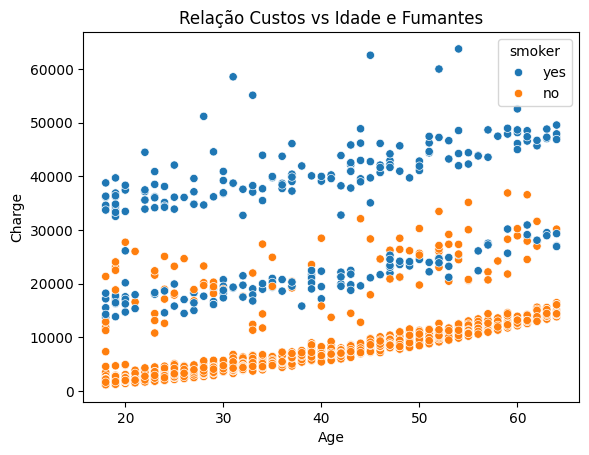

In [103]:
import seaborn as sns

sns.scatterplot(data=dataset, x='age', y='charges', hue='smoker')
plt.title('Relação Custos vs Idade e Fumantes')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.show()

In [104]:
import plotly.express as px

# fig = px.scatter(dados, x='custo', y='idade', color='fuma')
fig = px.scatter(dataset, x='age', y='charges', trendline_color_override='red', trendline='ols', color='smoker')
fig.show()

<Axes: xlabel='age'>

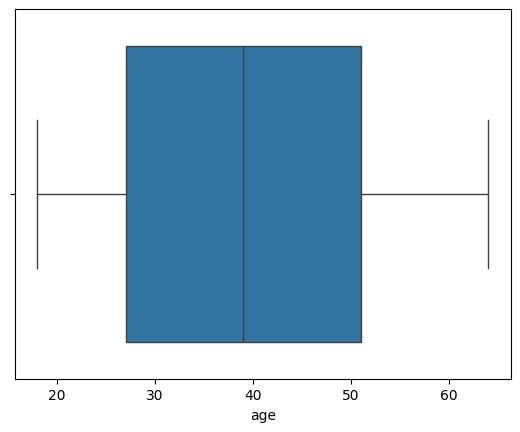

In [105]:
import seaborn as sb
sb.boxplot(x=dataset['age'])

<Axes: xlabel='charges'>

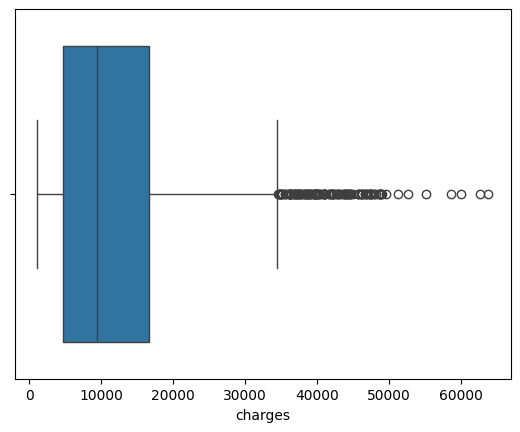

In [106]:
sb.boxplot(x=dataset['charges'])

outliers :: acima de ~40.000, alguns chegando a mais de 60.000.

**Encoders:**

1.  LabelEncoder;
2.  OrdinalEnconder;
3.  OneHotEncoder

FIT:: mapear internamente female -> 0, male -> 1
Transformer:: Substitui os valores da coluna original pelas representacoes numericas aprendida

In [107]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_encoded = dataset.copy()
# df_encoded['sex'] = le.fit_transform(df_encoded['sex'])
# df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numérica
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categórica
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Atribuindo os nomes das colunas
num_attributes = ['age', 'bmi', 'children']
cat_attributes = ['sex', 'smoker', 'region']

# Combinando tudo
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

#  Passo 1: Transforme os dados
X = dataset.drop('charges', axis=1)
y = dataset['charges']
X_prepared = full_pipeline.fit_transform(X)

# Passo 2: Recupere os nomes das colunas
# Nomes das colunas numéricas (iguais aos originais)
num_features = num_attributes

# Nomes das colunas categóricas transformadas pelo OneHotEncoder
cat_encoder = full_pipeline.named_transformers_['cat'].named_steps['encoder']
cat_feature_names = cat_encoder.get_feature_names_out(cat_attributes)

# Junta os nomes
all_feature_names = list(num_features) + list(cat_feature_names)

# Passo 3: Converta para DataFrame
df_encoded = pd.DataFrame(X_prepared, columns=all_feature_names)

In [109]:
df_encoded.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


smoker é a variável que mais influencia charges:: acho que faz sentido usar-la  sozinha como critério de estratificação no train_test_split

In [110]:
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df_encoded, test_size = 0.2, stratify=df_encoded['smoker_yes'], random_state = 7)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, stratify=df_encoded['smoker_yes'], random_state=42)

In [111]:
# print(len(df_train), "treinamento +", len(df_test), "teste")
print(len(X_train), "treinamento +", len(X_test), "teste")

1070 treinamento + 268 teste


In [112]:
# Aplicando OneHotEncoder na coluna region no df_encoded usando a funcao get_dummies
# df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

In [113]:
# X = df_encoded[['age', 'bmi', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']]  # Exemplo
# y = df_encoded['charges']

In [114]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, stratify=df_encoded['smoker_yes'], random_state=42)

In [115]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)
def calculate_mape(label, predictions):
  erros = np.abs(label - predictions)
  relative_erros = erros / np.abs(label)
  mape = np.mean(relative_erros) * 100
  return mape

**Regressão Dummy**

In [116]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Dummy Regressor (baseline)
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² (Regressão Dummy): {r2:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Regressão Dummy): {mae:.2f}")
print(f"MSE (Regressão Dummy): {mse:.2f}")
rmse = sqrt(mse)
print(f"Erro médio (RMSE): {rmse:.2f}")



mape_results = calculate_mape(y_test, y_pred)
print(f'O MAPE e: {mape_results:.2f}%')

R² (Regressão Dummy): -0.00
MAE (Regressão Dummy): 9239.52
MSE (Regressão Dummy): 147538431.33
Erro médio (RMSE): 12146.54
O MAPE e: 156.35%


**Regressão Linear**

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

print(f"R² (Regressão Linear): {r2_score(y_test, y_pred):.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Regressão Linear): {mae:.2f}")
print(f"MSE (Regressão Linear): {mse:.2f}")
rmse = sqrt(mse)
print(f"Erro médio (RMSE): {rmse:.2f}")

mape_results = calculate_mape(y_test, y_pred)
print(f'O MAPE e: {mape_results:.2f}%')

R² (Regressão Linear): 0.79
MAE (Regressão Linear): 3869.32
MSE (Regressão Linear): 31151264.04
Erro médio (RMSE): 5581.33
O MAPE e: 38.22%


**Árvore de Decisão**

In [118]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² (Árvore de Decisão): {r2:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Árvore de Decisão): {mae:.2f}")

print(f"MSE (Árvore de Decisão): {mse:.2f}")
rmse = sqrt(mse)
print(f"Erro médio (RMSE): {rmse:.2f}")

mape_results = calculate_mape(y_test, y_pred)
print(f'O MAPE e: {mape_results:.2f}%')

R² (Árvore de Decisão): 0.87
MAE (Árvore de Decisão): 2747.00
MSE (Árvore de Decisão): 19880451.92
Erro médio (RMSE): 4458.75
O MAPE e: 34.78%


In [119]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

for i in range(2, 10 + 1):
  tree_reg = DecisionTreeRegressor(max_depth=i, random_state=42)
  tree_reg.fit(X_train, y_train)

  y_pred = tree_reg.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"max_depth: {i}")
  print(f"R² (Árvore de Decisão): {r2:.2f}")

  mae = mean_absolute_error(y_test, y_pred)
  print(f"MAE (Árvore de Decisão): {mae:.2f}")

  print(f"MSE (Árvore de Decisão): {mse:.2f}")
  rmse = sqrt(mse)
  print(f"Erro médio (RMSE): {rmse:.2f}")

  mape_results = calculate_mape(y_test, y_pred)
  print(f'O MAPE e: {mape_results:.2f}%')
  print("**************************************************")

max_depth: 2
R² (Árvore de Decisão): 0.83
MAE (Árvore de Decisão): 3331.34
MSE (Árvore de Decisão): 24918469.17
Erro médio (RMSE): 4991.84
O MAPE e: 48.49%
**************************************************
max_depth: 3
R² (Árvore de Decisão): 0.86
MAE (Árvore de Decisão): 2791.10
MSE (Árvore de Decisão): 20891760.15
Erro médio (RMSE): 4570.75
O MAPE e: 35.90%
**************************************************
max_depth: 4
R² (Árvore de Decisão): 0.87
MAE (Árvore de Decisão): 2747.00
MSE (Árvore de Decisão): 19880451.92
Erro médio (RMSE): 4458.75
O MAPE e: 34.78%
**************************************************
max_depth: 5
R² (Árvore de Decisão): 0.87
MAE (Árvore de Decisão): 2625.58
MSE (Árvore de Decisão): 19471539.67
Erro médio (RMSE): 4412.66
O MAPE e: 32.79%
**************************************************
max_depth: 6
R² (Árvore de Decisão): 0.85
MAE (Árvore de Decisão): 2621.68
MSE (Árvore de Decisão): 21488822.86
Erro médio (RMSE): 4635.60
O MAPE e: 33.61%
****************

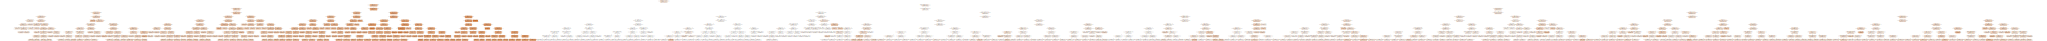

In [120]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(tree_reg, filled=True, rounded=True,
                            feature_names=df_encoded.columns)
grafico = graphviz.Source(estrutura)
grafico

**🔎 Métricas dos Modelos**

---
<br>

| Modelo | R² | MSE (Erro Quadrático Médio) | RMSE (Raiz do Erro Quadrático Médio) |
|---|---|---|---|
| Dummy Regressor    | -0.00 | 147.538.431,33 | 12.146,54 |
| Regressão Linear   | 0.79% | 31.151.264,04  | 5.581,33  |
| Árvore de Decisãor | 0.87% | 19.880.451,92  | 4.458,75  |

<br>

📌 Análise Comparativa
<br>
<br>
✅**1. Dummy Regressor**

**Propósito:** Serve como base comparativa. Ele simplesmente prevê a média do valor alvo (charges) para todos os exemplos.
<br>

**Resultado:** Como esperado, seu desempenho é muito ruim, com R² ≈ 0, o que indica que ele não explica nenhuma variabilidade dos dados.
<br>
<br>

✅ **2. Regressão Linear**

R² de 0.79 significa que o modelo consegue explicar 79% da variabilidade nos custos de plano de saúde.
<br>

RMSE = 5.581,33 indica um erro médio razoavelmente bom, considerando os valores dos custos (se estão na casa dos milhares).
<br>

**Conclusão:** Um modelo simples e eficiente. Boa escolha inicial.
<br>
<br>

✅ **3. Árvore de Decisão**

Melhor desempenho entre os três, com R² = 0.87 (87% da variabilidade explicada).

Menor MSE e RMSE → erro médio de 4.458,75, mais baixo que os outros.

**Conclusão:** A árvore se ajusta melhor ao padrão dos dados, podendo capturar relações não lineares que a regressão linear não capta.
<br>
<br>

🎯 Conclusão Final
<br>
<br>
✅ A Árvore de Decisão é o modelo com melhor desempenho geral, explicando mais a variabilidade dos custos e com menor erro médio.
<br>
<br>
🔁 A Regressão Linear é boa, especialmente se você precisa de interpretabilidade e simplicidade.
<br>
<br>
❌ O Dummy Regressor confirma que os dois modelos de verdade são de fato muito melhores do que um chute aleatório.

**APLICANDO REDUÇÃO DE DIMENSIONALIDADE - PCA**

In [121]:
print(f"O df_encoded original tem: {len(df_encoded.columns)} colunas")

O df_encoded original tem: 11 colunas


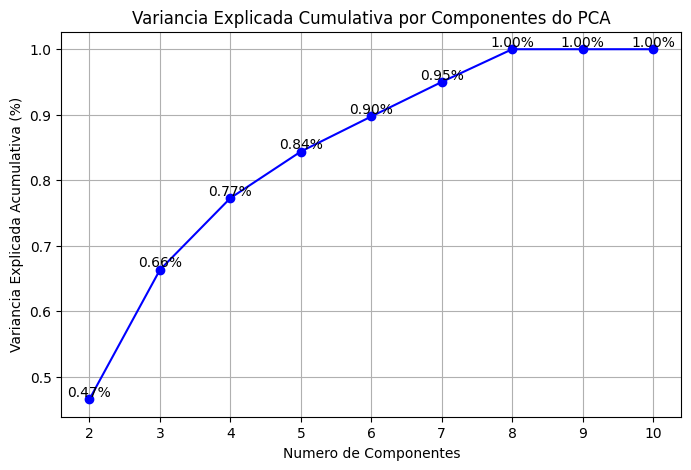

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Lista para armazenar resultados
results = []

# Dados de exemplo
X = df_encoded
min = 2
max = len(X.columns)

# Fazer um loop de 2 a 4 componentes
for n in range(min, max):
  # Crie um objeto PCA
  pca = PCA(n_components=n)

  # Ajuste o PCA aos seus dados
  pca.fit(X)

  # Calcule a variancia explicada cumulativa e adicione aos resultados
  explaned_variance = np.sum(pca.explained_variance_ratio_)
  results.append(explaned_variance)

# Plotar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(range(min, max), results, marker='o', linestyle='-', color='b')
plt.xlabel('Numero de Componentes')
plt.ylabel('Variancia Explicada Acumulativa (%)')
plt.title('Variancia Explicada Cumulativa por Componentes do PCA')
plt.grid(True)

# Adicione rotulos aos pontos de dados
for i, (n_components, explained_variance) in enumerate(zip(range(min, max), results)):
  plt.text(n_components, explained_variance, f'{explained_variance:.2f}%', ha='center', va='bottom')

plt.show()

In [123]:
for i in range(2, len(df_encoded.columns) + 1):
  pca = PCA(n_components=i)
  principalComponents = pca.fit_transform(df_encoded)

  lista_colunas_componentes = [f'PC{i+1}' for i in range(i)]
  df_pca = pd.DataFrame(data=principalComponents, columns=lista_colunas_componentes)

  target = pd.Series(y, name='target')

  result_df = pd.concat([df_pca, target], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mse=mean_squared_error(y_test, y_pred)

  print(f"Quantidade de colunas: {len(df_pca.columns)}")

  print(f'Variancia de cada componente: {pca.explained_variance_ratio_}')
  print(f'Soma total da variancia: {round(sum(list(pca.explained_variance_ratio_)) * 100, 2)}')

  print(f"R² (Regressão Linear): {r2_score(y_test, y_pred):.2f}")
  mae = mean_absolute_error(y_test, y_pred)
  print(f"MAE (Regressão Linear): {mae:.2f}")
  print(f"MSE (Regressão Linear): {mse:.2f}")
  rmse = sqrt(mse)
  print(f"Erro médio (RMSE): {rmse:.2f}")

  mape_results = calculate_mape(y_test, y_pred)
  print(f'O MAPE e: {mape_results:.2f}%')
  print("***********************************************")

Quantidade de colunas: 2
Variancia de cada componente: [0.24752343 0.21790034]
Soma total da variancia: 46.54
R² (Regressão Linear): 0.14
MAE (Regressão Linear): 9286.50
MSE (Regressão Linear): 134048676.31
Erro médio (RMSE): 11577.94
O MAPE e: 135.99%
***********************************************
Quantidade de colunas: 3
Variancia de cada componente: [0.24752343 0.21790034 0.19759047]
Soma total da variancia: 66.3
R² (Regressão Linear): 0.15
MAE (Regressão Linear): 9211.82
MSE (Regressão Linear): 132131496.47
Erro médio (RMSE): 11494.85
O MAPE e: 130.04%
***********************************************
Quantidade de colunas: 4
Variancia de cada componente: [0.24752343 0.21790034 0.19759047 0.10962917]
Soma total da variancia: 77.26
R² (Regressão Linear): 0.17
MAE (Regressão Linear): 8853.18
MSE (Regressão Linear): 128285869.11
Erro médio (RMSE): 11326.34
O MAPE e: 127.56%
***********************************************
Quantidade de colunas: 5
Variancia de cada componente: [0.2475234

In [124]:
for i in range(2, len(df_encoded.columns) + 1):
  pca = PCA(n_components=i)
  principalComponents = pca.fit_transform(df_encoded)

  lista_colunas_componentes = [f'PC{i+1}' for i in range(i)]
  df_pca = pd.DataFrame(data=principalComponents, columns=lista_colunas_componentes)

  target = pd.Series(y, name='target')

  result_df = pd.concat([df_pca, target], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

  tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
  tree_reg.fit(X_train, y_train)

  y_pred = tree_reg.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Quantidade de colunas: {len(df_pca.columns)}")

  print(f'Variancia de cada componente: {pca.explained_variance_ratio_}')
  print(f'Soma total da variancia: {round(sum(list(pca.explained_variance_ratio_)) * 100, 2)}')

  print(f"R² (Árvore de Decisão): {r2:.2f}")

  mae = mean_absolute_error(y_test, y_pred)
  print(f"MAE (Regressão Linear): {mae:.2f}")

  print(f"MSE (Árvore de Decisão): {mse:.2f}")
  rmse = sqrt(mse)
  print(f"Erro médio (RMSE): {rmse:.2f}")

  mape_results = calculate_mape(y_test, y_pred)
  print(f'O MAPE e: {mape_results:.2f}%')
  print("***********************************************")

Quantidade de colunas: 2
Variancia de cada componente: [0.24752343 0.21790034]
Soma total da variancia: 46.54
R² (Árvore de Decisão): 0.04
MAE (Regressão Linear): 9592.32
MSE (Árvore de Decisão): 148813036.79
Erro médio (RMSE): 12198.89
O MAPE e: 138.56%
***********************************************
Quantidade de colunas: 3
Variancia de cada componente: [0.24752343 0.21790034 0.19759047]
Soma total da variancia: 66.3
R² (Árvore de Decisão): -0.02
MAE (Regressão Linear): 9754.14
MSE (Árvore de Decisão): 158757208.68
Erro médio (RMSE): 12599.89
O MAPE e: 143.15%
***********************************************
Quantidade de colunas: 4
Variancia de cada componente: [0.24752343 0.21790034 0.19759047 0.10962917]
Soma total da variancia: 77.26
R² (Árvore de Decisão): 0.38
MAE (Regressão Linear): 6706.73
MSE (Árvore de Decisão): 95766257.36
Erro médio (RMSE): 9786.02
O MAPE e: 86.39%
***********************************************
Quantidade de colunas: 5
Variancia de cada componente: [0.247